<a href="https://colab.research.google.com/github/claudio1975/Medium-blog/blob/master/Langchain_%26_OpenAI_in_Action/Text_Data_Analysis_with_LangChain_%26_OpenAI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and prepare Workspace

##### datasource: https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text

The dataset is coming from the emotion detection challenge.

The data is basically a collection of tweets annotated with the emotions behind them. There are three columns: tweet_id, sentiment, and content. In "content" there is the raw tweet. In "sentiment" there is the emotion behind the tweet.

This public domain dataset is collected from data.world platform.

The dataset is composed by 13 different emotion and 40.000 records.

In [1]:
# Install the langchain package
!pip install langchain &> /dev/null

In [2]:
# Install the langchain package with openai
!pip install -U langchain-openai &> /dev/null

In [3]:
# Import the os package
import os

# Import the openai package
import openai

# Set openai.api_key to the OPENAI_API_KEY environment variable
os.environ["OPENAI_API_KEY"] = " "

In [4]:
# Import the langchain package as lc
import langchain as lc

# From the langchain.chat_models module, import ChatOpenAI
from langchain_openai import ChatOpenAI

# From the langchain.schema module, import AIMessage, HumanMessage, SystemMessage
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [5]:
# Import pandas using the alias pd
import pandas as pd

# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

In [6]:
# Create a ChatOpenAI object. Assign to chat.
chat = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

In [7]:
lc.__version__

'0.1.6'

In [8]:
openai.__version__

'1.12.0'

### Have a look of the data set

In [9]:
# Read the data.
emotion = pd.read_csv("tweet_emotions.csv")

# Display a description of the numeric columns
print("Description of numeric columns\n")
display(emotion.describe())

# Display a description of the text (object) columns
print("Description of text columns\n")
display(emotion.describe(include="O"))

# Print the whole dataset
print("The tweet_emotions dataset\n")
emotion

Description of numeric columns



,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


Description of text columns



,sentiment,content
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lov...
freq,8638,14


The tweet_emotions dataset



,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


### Prepare the contest for GPT

In [10]:
# A description of the dataset

dataset_description = """
You have a dataset about tweet emotions. It is available as a pandas DataFrame named `emotion`.

The data is basically a collection of tweets annotated with the emotions behind them.
The data that we have is having 13 different emotion into 40000 records.

The dataset contains the following columns.
- 'tweet_id' (integer): the identification number of the tweet
- 'sentiment' (character): the emotion behind the tweet.
- 'content'(character): the raw tweet.
"""


In [11]:
# Concatenate the dataset description and the context.
msgs_context = [
                SystemMessage(content="You are an expert data scientist, and you are involved in a dataset analysis."),
                HumanMessage(content=f"{dataset_description}")
]

### Use GPT as code assistant to run a data analysis on the data set

### Data Analysis on the sentiment distribution

In [12]:
# Ask GPT to provide code for a bar plot of the sentiment
msgs_python_barplot = msgs_context+[
    HumanMessage(content="Write some Python code to draw a univariate distribution of the 'sentiment' variable. Use the matplotlib package.")]

rsps_python_barplot = chat.invoke(msgs_python_barplot)

display(Markdown(rsps_python_barplot.content))

Sure! Here's an example code to draw a univariate distribution of the 'sentiment' variable using the matplotlib package:

```python
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = emotion['sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)
plt.show()
```

This code will create a bar plot showing the distribution of sentiments in the 'sentiment' variable. The x-axis represents the different sentiments, and the y-axis represents the count of each sentiment. The `rotation=45` argument in `plt.xticks()` is used to rotate the x-axis labels by 45 degrees for better readability.

Make sure you have the matplotlib package installed before running this code. You can install it using `pip install matplotlib`.

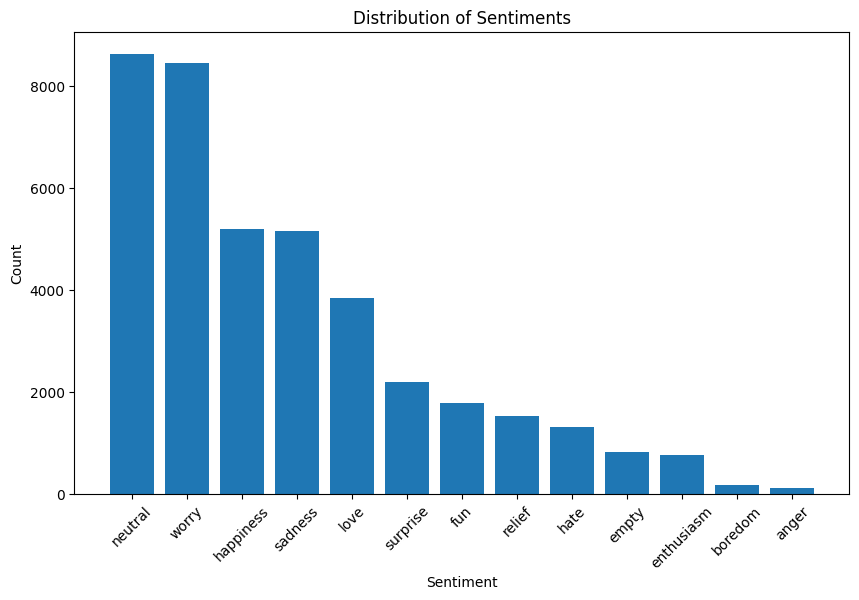

In [13]:
# Import the necessary libraries:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = emotion['sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)
plt.show()

#### Data Analysis on the top ten words distribution from the text of the data set

In [14]:
# Ask GPT to provide code for a bar plot of the top 10 words from content
msgs_python_plot = msgs_context+[
    HumanMessage(content=
"""
Write some Python code to draw a univariate distribution of the top ten words occurrence from the 'content' variable.\
Pleae clean the text, by tokenization, removing the stop words, removing unicode characters, removing punctuaction and numbers, and apply lemmatization.\
Every word have at least five characters. Use the matplotlib package.
""")]

rsps_python_plot = chat.invoke(msgs_python_plot)

display(Markdown(rsps_python_plot.content))

Sure! Here's the Python code to draw a univariate distribution of the top ten words occurrence from the 'content' variable after cleaning the text:

```python
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download stopwords and lemmatizer data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
emotion = pd.read_csv('your_dataset.csv')

# Clean the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords, unicode characters, punctuation, and numbers
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and len(token) >= 5 and token not in stop_words]
    
    return tokens

# Apply text cleaning to 'content' column
emotion['clean_content'] = emotion['content'].apply(clean_text)

# Count the occurrence of each word
word_counts = Counter([word for words in emotion['clean_content'] for word in words])

# Get the top ten words with highest occurrence
top_words = word_counts.most_common(10)

# Extract the words and their counts
words, counts = zip(*top_words)

# Plot the univariate distribution
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Top Ten Words Occurrence')
plt.xticks(rotation=45)
plt.show()
```

Make sure to replace `'your_dataset.csv'` with the actual file path of your dataset.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


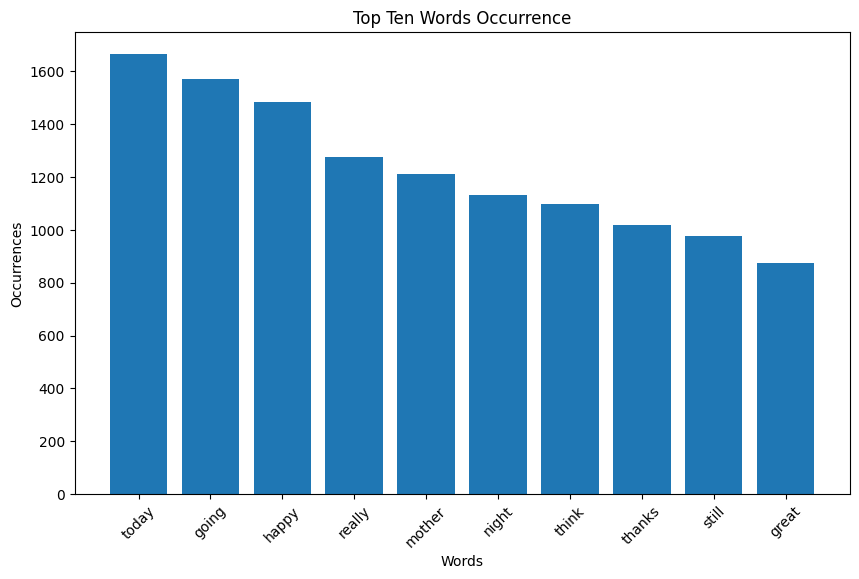

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download stopwords and lemmatizer data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
#emotion = pd.read_csv('your_dataset.csv')

# Clean the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords, unicode characters, punctuation, and numbers
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and len(token) >= 5 and token not in stop_words]

    return tokens

# Apply text cleaning to 'content' column
emotion['clean_content'] = emotion['content'].apply(clean_text)

# Count the occurrence of each word
word_counts = Counter([word for words in emotion['clean_content'] for word in words])

# Get the top ten words with highest occurrence
top_words = word_counts.most_common(10)

# Extract the words and their counts
words, counts = zip(*top_words)

# Plot the univariate distribution
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Top Ten Words Occurrence')
plt.xticks(rotation=45)
plt.show()


#### Length Analysis of the text (stop words, url, hashtags, mean word length)

In [16]:
# Ask GPT to provide code for a histogram plot for features about length analysis

msgs_python_length_plot = msgs_context+[
    HumanMessage(content=
"""
Write some Python code to draw a univariate distribution of features extracted from the 'content' variable.\
Features are: stop words, url, hashtag, mean word length.\
Organize charts into two columns and two rows.\
Use the matplotlib package.
""")]

rsps_python_length_plot = chat.invoke(msgs_python_length_plot)

display(Markdown(rsps_python_length_plot.content))

Sure! Here's the Python code to draw a univariate distribution of features extracted from the 'content' variable using the matplotlib package:

```python
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords

# Function to count the number of stop words in a tweet
def count_stop_words(tweet):
    stop_words = set(stopwords.words('english'))
    words = tweet.split()
    stop_words_count = sum(1 for word in words if word.lower() in stop_words)
    return stop_words_count

# Function to count the number of URLs in a tweet
def count_urls(tweet):
    urls_count = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet))
    return urls_count

# Function to count the number of hashtags in a tweet
def count_hashtags(tweet):
    hashtags_count = len(re.findall(r'#(\w+)', tweet))
    return hashtags_count

# Function to calculate the mean word length in a tweet
def mean_word_length(tweet):
    words = tweet.split()
    word_lengths = [len(word) for word in words]
    mean_length = sum(word_lengths) / len(word_lengths)
    return mean_length

# Extract features from the 'content' variable
emotion['stop_words_count'] = emotion['content'].apply(count_stop_words)
emotion['urls_count'] = emotion['content'].apply(count_urls)
emotion['hashtags_count'] = emotion['content'].apply(count_hashtags)
emotion['mean_word_length'] = emotion['content'].apply(mean_word_length)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot distribution of stop words count
axes[0, 0].hist(emotion['stop_words_count'], bins=20, color='blue')
axes[0, 0].set_title('Distribution of Stop Words Count')

# Plot distribution of URLs count
axes[0, 1].hist(emotion['urls_count'], bins=20, color='green')
axes[0, 1].set_title('Distribution of URLs Count')

# Plot distribution of hashtags count
axes[1, 0].hist(emotion['hashtags_count'], bins=20, color='red')
axes[1, 0].set_title('Distribution of Hashtags Count')

# Plot distribution of mean word length
axes[1, 1].hist(emotion['mean_word_length'], bins=20, color='orange')
axes[1, 1].set_title('Distribution of Mean Word Length')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
```

This code will create a 2x2 grid of subplots, where each subplot represents the distribution of a specific feature extracted from the 'content' variable. The features include the count of stop words, URLs, hashtags, and the mean word length in each tweet. The histograms will show the distribution of these features across the dataset.

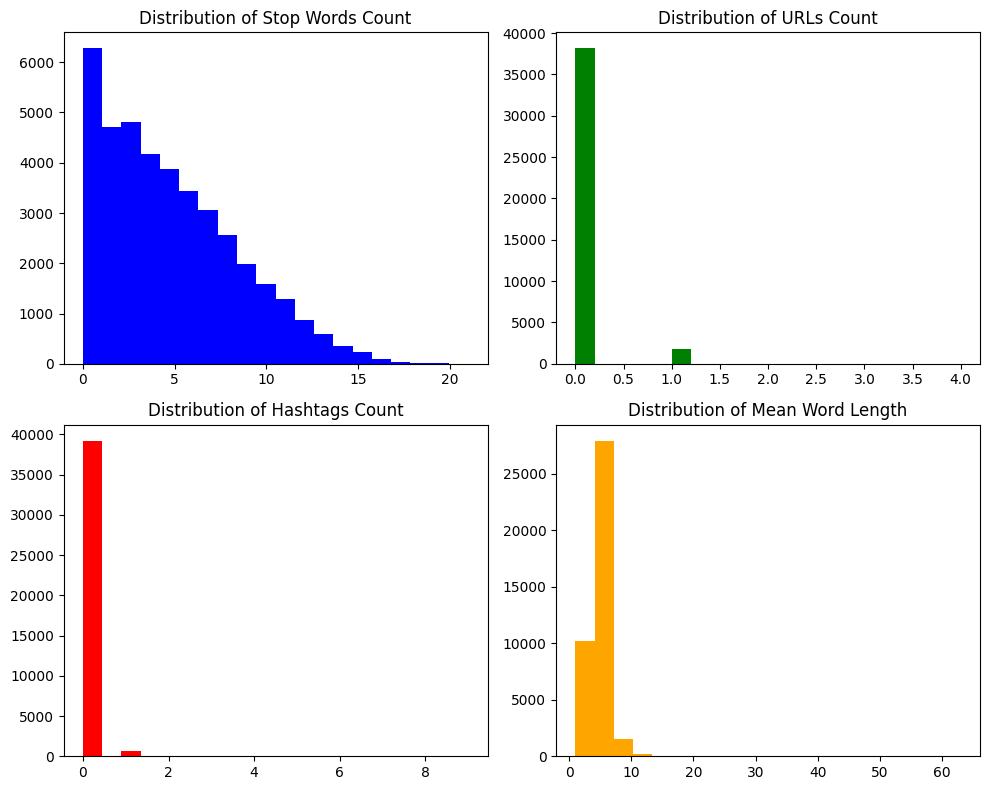

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords

# Function to count the number of stop words in a tweet
def count_stop_words(tweet):
    stop_words = set(stopwords.words('english'))
    words = tweet.split()
    stop_words_count = sum(1 for word in words if word.lower() in stop_words)
    return stop_words_count

# Function to count the number of URLs in a tweet
def count_urls(tweet):
    urls_count = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*()(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet))
    return urls_count

# Function to count the number of hashtags in a tweet
def count_hashtags(tweet):
    hashtags_count = len(re.findall(r'#(\w+)', tweet))
    return hashtags_count

# Function to calculate the mean word length in a tweet
def mean_word_length(tweet):
    words = tweet.split()
    word_lengths = [len(word) for word in words]
    mean_length = sum(word_lengths) / len(word_lengths)
    return mean_length

# Extract features from the 'content' variable
emotion['stop_words_count'] = emotion['content'].apply(count_stop_words)
emotion['urls_count'] = emotion['content'].apply(count_urls)
emotion['hashtags_count'] = emotion['content'].apply(count_hashtags)
emotion['mean_word_length'] = emotion['content'].apply(mean_word_length)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot distribution of stop words count
axes[0, 0].hist(emotion['stop_words_count'], bins=20, color='blue')
axes[0, 0].set_title('Distribution of Stop Words Count')

# Plot distribution of URLs count
axes[0, 1].hist(emotion['urls_count'], bins=20, color='green')
axes[0, 1].set_title('Distribution of URLs Count')

# Plot distribution of hashtags count
axes[1, 0].hist(emotion['hashtags_count'], bins=20, color='red')
axes[1, 0].set_title('Distribution of Hashtags Count')

# Plot distribution of mean word length
axes[1, 1].hist(emotion['mean_word_length'], bins=20, color='orange')
axes[1, 1].set_title('Distribution of Mean Word Length')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### WordCloud

In [18]:
# Ask GPT to provide code for a wordcloud

msgs_python_wordcloud_plot = msgs_context+[
    HumanMessage(content=
"""
Write some Python code to draw a wordcloud from the 'clean_content' variable.\
If is necessary, transform the variable into string to be used in the wordcloud.
Use the matplotlib package.
""")]

rsps_python_wordcloud_plot = chat.invoke(msgs_python_wordcloud_plot)

display(Markdown(rsps_python_wordcloud_plot.content))

Sure! To draw a wordcloud from the 'clean_content' variable, you can use the `WordCloud` class from the `wordcloud` library and the `matplotlib` package for visualization. Here's an example code snippet to help you get started:

```python
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already cleaned the 'content' column and stored it as 'clean_content'
clean_content = emotion['content'].astype(str)

# Concatenate all the cleaned tweets into a single string
all_text = ' '.join(clean_content)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the wordcloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
```

Make sure you have the `wordcloud` and `matplotlib` libraries installed before running this code. You can install them using `pip install wordcloud matplotlib`.

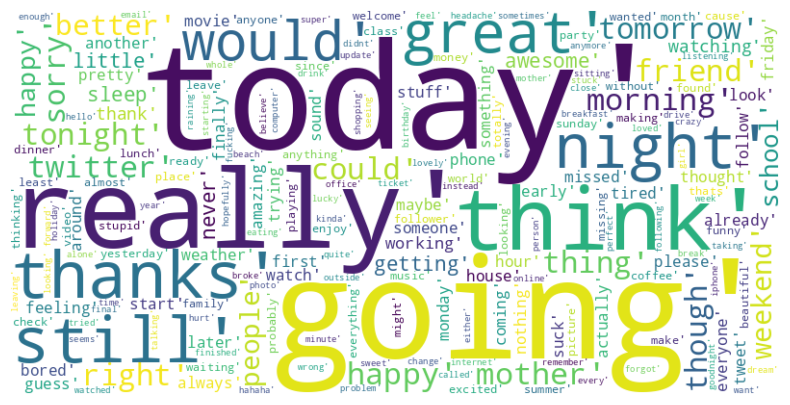

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the 'clean_content' column to a single string
all_text = ' '.join(emotion['clean_content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the wordcloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()